In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mehmettahiraslan/customer-shopping-dataset")

print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 1.63M/1.63M [00:01<00:00, 1.24MB/s]

Extracting files...
Path to dataset files: /Users/hariharan.aditya/.cache/kagglehub/datasets/mehmettahiraslan/customer-shopping-dataset/versions/2


In [4]:
df = pd.read_csv(path + "/customer_shopping_data.csv")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


1) Check if there is any missing or duplicate data

In [9]:
df.isna().sum()


invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

No NaN values

In [12]:
df.duplicated().sum()

np.int64(0)

No duplicate data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


2) Data wrangling

In [19]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')
df['month'] = df['invoice_date'].dt.month
df['year'] = df['invoice_date'].dt.year

In [20]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,2021
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11,2021
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,2021


Since invoice_no and customer_id are unique, dropping these two columns to have only usable data

In [21]:
df.drop(columns=['invoice_no', 'customer_id'],axis=1, inplace=True)

In [22]:
df.head()

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year
0,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8,2022
1,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,2021
2,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11,2021
3,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,2021
4,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,2021


Now lets analyze the data with visualizations

<Axes: title={'center': 'Shopper gender distribution'}, ylabel='count'>

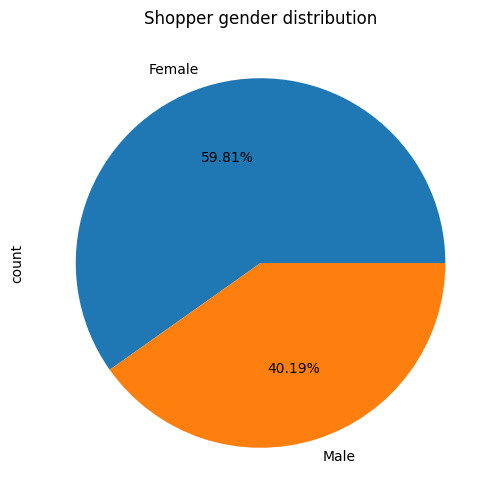

In [34]:
df['gender'].value_counts().plot(kind='pie', autopct='%1.2f%%', figsize=(6,6), title = 'Shopper gender distribution')

There is a 60:40 ratio of Female to Male shoppers

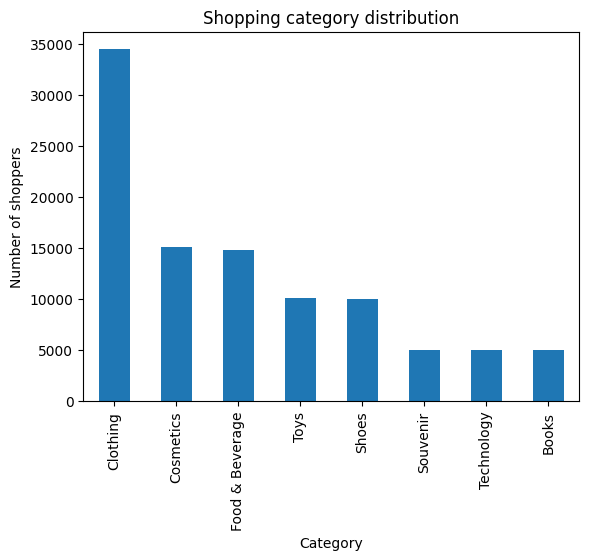

In [53]:
df['category'].value_counts().plot(kind='bar', title='Shopping category distribution')
plt.ylabel('Number of shoppers')
plt.xlabel('Category')
plt.show()

Most shoppers purchase clothing

Lets see how much spending was done in each of these malls

<Axes: title={'center': 'Total sales per mall'}, xlabel='Mall', ylabel='Total sales'>

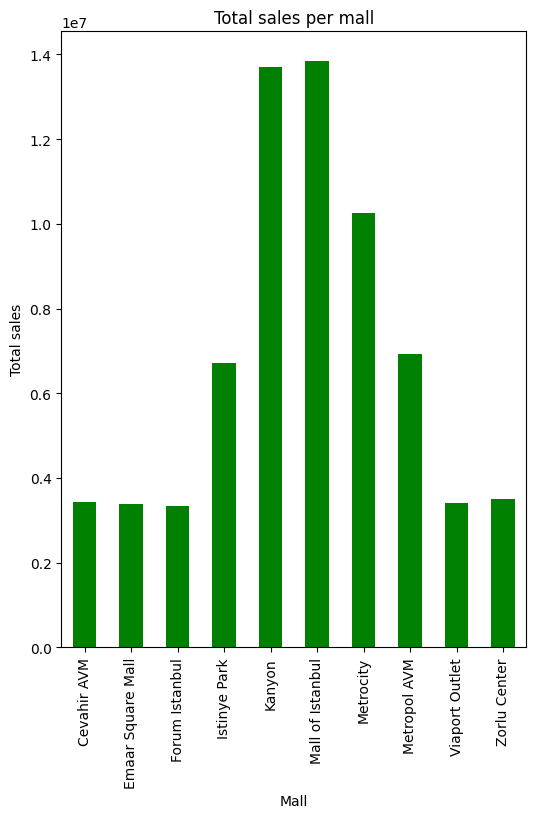

In [61]:
df.groupby('shopping_mall')['price'].sum().plot(kind='bar', figsize=(6,8), title= 'Total sales per mall', xlabel='Mall', ylabel='Total sales', color='green')

Lets try to see gender specific shopping categories

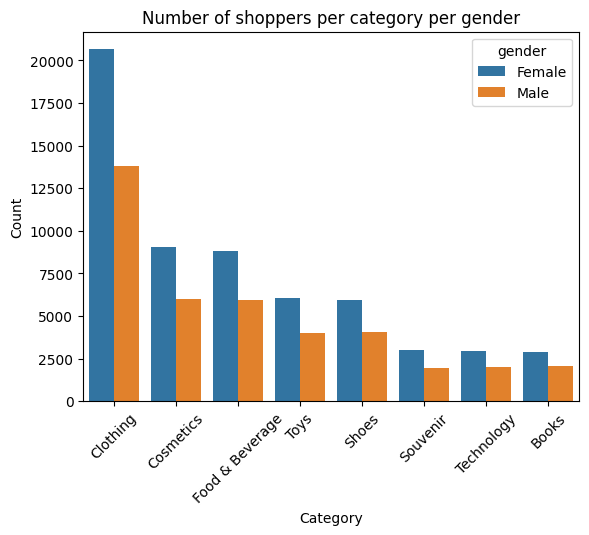

In [77]:
sns.countplot(data=df, x='category', hue='gender', order=df['category'].value_counts().index)
plt.title('Number of shoppers per category per gender')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

What is the spending based on these categories and gender?

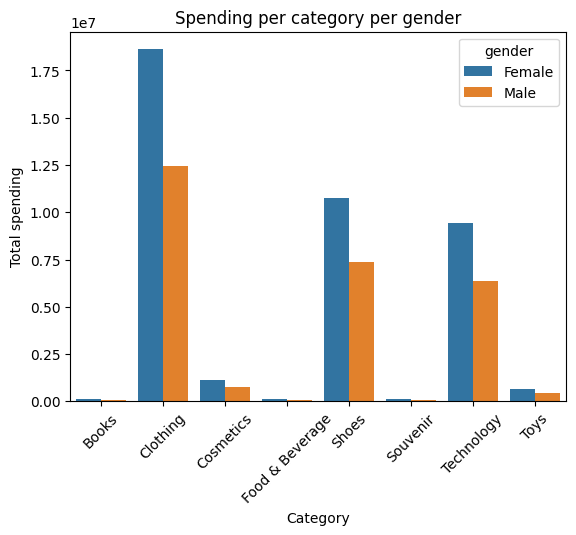

In [85]:
group1 = df.groupby(['category','gender'])['price'].sum().reset_index()
sns.barplot(data=group1, x='category', y='price', hue='gender')
plt.title('Spending per category per gender')
plt.xlabel('Category')
plt.ylabel('Total spending')
plt.xticks(rotation=45)
plt.show()